# Yearly Extent
Here, we construct figures showcasing the evolution of yearly defoliation extent from 2020 to 2023.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import matplotlib as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import rasterio as rio
from rasterio.transform import array_bounds
from rasterio.warp import calculate_default_transform, reproject, Resampling
import ultraplot as uplt

## Load Data

In [4]:
def process_forest_tiles(filename):
    df = gpd.read_file(filename)
    df['defol_forest_2'] = df['defoliation_2']/df['forest']
    df['defol_forest_mask_2'] = df['defoliation_2']/df['qa_mask_2']
    df['defol_forest_3'] = df['defoliation_3']/df['forest']
    df['defol_forest_mask_3'] = df['defoliation_3']/df['qa_mask_3']
    return df

forest_2020 = process_forest_tiles('./Data/TimeImpacts/forest_grid_2020.geojson')
forest_2021 = process_forest_tiles('./Data/TimeImpacts/forest_grid_2021.geojson')
forest_2022 = process_forest_tiles('./Data/TimeImpacts/forest_grid_2022.geojson')
forest_2023 = process_forest_tiles('./Data/TimeImpacts/forest_grid_2023.geojson')

In [5]:
min_prop = 3/4
forest_2020['suf_obs'] = forest_2020['qa_mask_3']/forest_2020['forest'] >= min_prop
forest_2021['suf_obs'] = forest_2021['qa_mask_3']/forest_2021['forest'] >= min_prop
forest_2022['suf_obs'] = forest_2022['qa_mask_3']/forest_2022['forest'] >= min_prop
forest_2023['suf_obs'] = forest_2023['qa_mask_3']/forest_2023['forest'] >= min_prop

## Helper Functions

In [6]:
def add_raster_data(ax, image, bounds, year, crs, vmin, vmax, cmap):
    m = ax.imshow(image, cmap=cmap, levels=np.linspace(vmin, vmax, 11), transform=crs,
                  extent=[bounds[0], bounds[2], bounds[1], bounds[3]])
    ax.format(grid=False, facecolor='white', title=str(year))
    ax.set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES)
    
    return m

In [7]:
def classify(image, threshold):
    image_thresh = image.copy()
    image_thresh = np.greater(image, threshold, out=image_thresh, where=~np.isnan(image))
    return image_thresh

# Plot extent maps

## Seperate Maps and Yealy Extent

C:\Users\camer\miniforge3\envs\defoliation\Lib\site-packages\ultraplot\figure.py:2063: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb = super().colorbar(mappable, cax=cax, **kwargs)


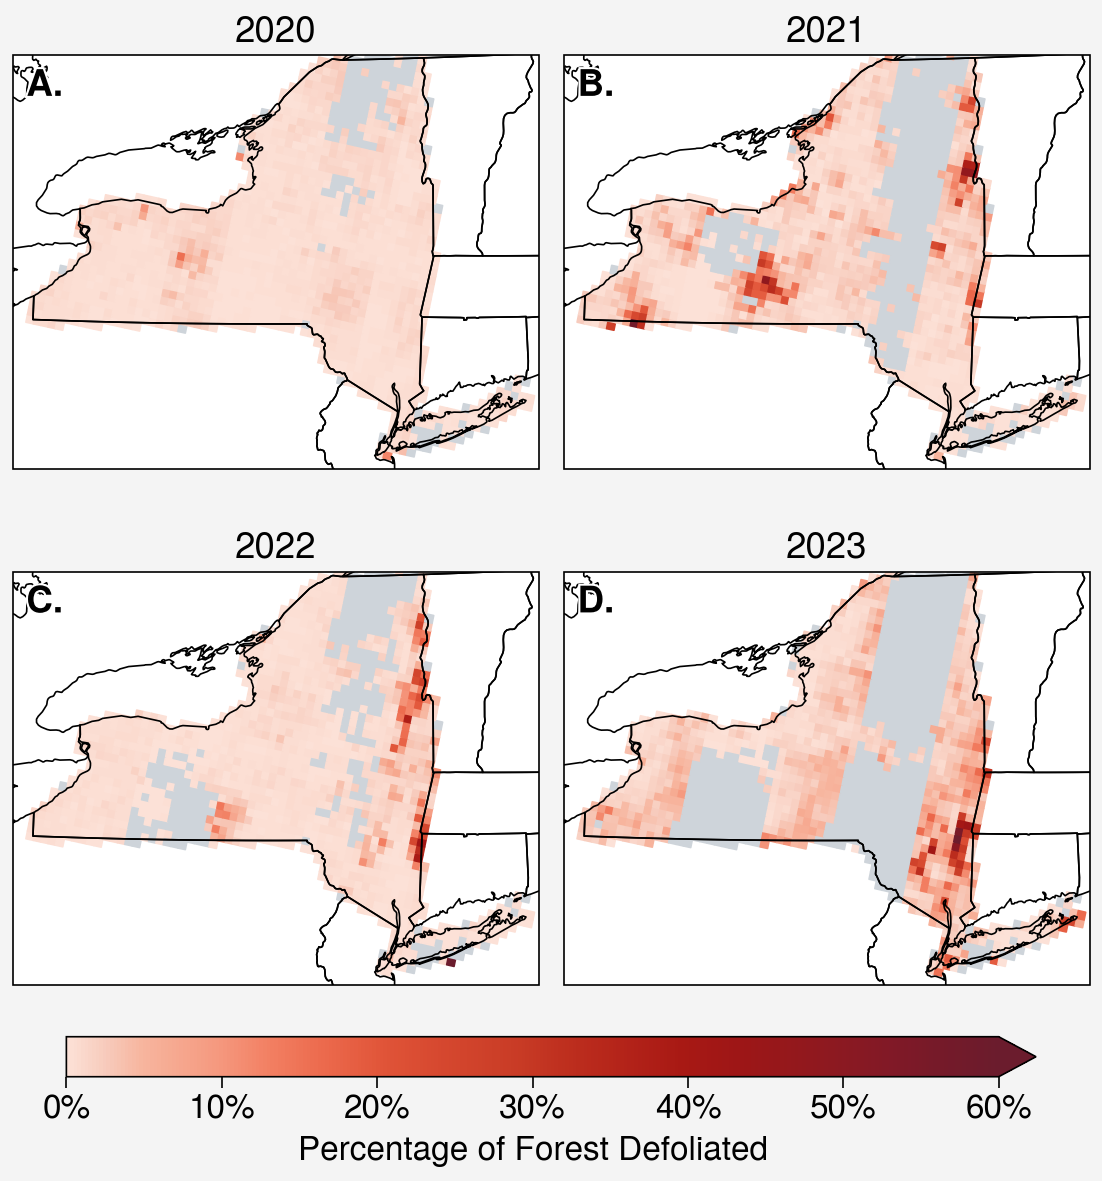

In [13]:
fig, axes = uplt.subplots(ncols=2, nrows=2, figsize=('140mm','150mm'), proj={(1, 2, 3, 4):dest_crs}, 
                          facecolor='white', fontsize=12, share=False)

axes.format(abc='A.', abcloc='ul')

norm = plt.colors.Normalize(vmin=0, vmax=0.6)
cmap = uplt.Colormap('Reds3')
cmap_bars = ['gray2', 'blood red']

for i, forest in enumerate([forest_2020, forest_2021, forest_2022, forest_2023]):
    if forest is None:
        continue
    for row in forest.itertuples():
        if row.suf_obs:
            region = cfeature.ShapelyFeature(
                row.geometry,
                ccrs.epsg(5070),
                facecolor=cmap(norm(row.defol_forest_3)),
                edgecolor=cmap(norm(row.defol_forest_3)))
        else:
            region = cfeature.ShapelyFeature(
                row.geometry,
                ccrs.epsg(5070),
                facecolor='gray4',
                edgecolor='gray4')
        axes[i].add_feature(region)
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].add_feature(cfeature.STATES)
    axes[i].format(grid=False, facecolor='white', title=str(2020 + i))

fig.colorbar(cmap, vmin=norm.vmin, vmax=norm.vmax, 
             loc='b', cols=[1,2], length=0.9, 
             label="Percentage of Forest Defoliated", labelsize=12, 
             ticklabels=['0%', '10%', '20%', '30%', '40%', '50%', '60%'], ticklabelsize=12,
             ticklocator=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
             extend='max')

fig.savefig('./Figures/YearlyExtent/extent_upscaled_10k_2020_to_2023_masked.png')

In [ ]:
np.count_nonzero(forest_2020['forest'] >= forest_2020['qa_mask_3'])

In [37]:
np.log(0.00000001 + forest_2022['defol_forest_3']/(1 - forest_2022['defol_forest_3']))

0      -7.078282
1      -5.601579
2      -6.060978
3      -5.322923
4      -7.688490
          ...   
1420   -4.759588
1421   -4.128086
1422   -4.422438
1423   -4.990073
1424   -4.784463
Name: defol_forest_3, Length: 1425, dtype: float64